<a href="https://colab.research.google.com/github/MariaIsabelLL/AnalisisSentimientosTwitter/blob/main/4_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy 
from tweepy import OAuthHandler

#Credenciales del Twitter API
access_key = "XXXXXX"
access_secret = "XXXXXX"
consumer_key = "XXXXXX"
consumer_secret = "XXXXXX"

'''Método de Autenticación para conectarse a twitter'''
def autenticacion():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    return api

'''leer el timeline de nuestra cuenta de Twitter '''
def get_my_tweets():      
    api = autenticacion()
    public_tweets = api.home_timeline(20)
    for tweet in public_tweets:
        print (tweet.text)

get_my_tweets()

Perú debe reconocer el tráfico ilegal de vida silvestre como crimen organizado, recomienda USAID https://t.co/unZavQEBHw
COVID-19: 400 mil adultos mayores de 65 años no han completado su proceso de vacunación https://t.co/C6nwSEVSZV
Gianluca Lapadula y Santiago Ormeño: analizamos el estilo de juego de las grandes apuestas de Gareca en la delanter… https://t.co/HRGUBR5Zt4
Cómo solicitar la Ficha de Canje Internacional y para qué sirve ►https://t.co/KKgNcKahEp https://t.co/D1aNsBTTzb
Día del Orgullo LGBT+: Actividades que se realizarán en Lima para celebrar esta fecha https://t.co/7PDcuUOzW6… https://t.co/lfZBJZXm5p
🔴 [#LOÚLTIMO] JNE: Víctor Rodríguez Monteza juramentará como miembro titular este sábado 26 de junio… https://t.co/l3JaFpjHFc
🔴Embajador peruano a presidente del Consejo Permanente de la OEA: “Proceso electoral no ha concluido”… https://t.co/3Luew63x9f
🔴INSN San Borja realiza más de 33 mil cirugías complejas a niños de todo el país en 8 años de funcionamiento… https://t.co/V5

In [ ]:
from datetime import datetime

'''obtener información de un usuario'''
def get_last_tweets_x_user(screen_name):
    api = autenticacion()
    tweetCount = 10
    
    print("Getting data for " + screen_name)
    item = api.get_user(screen_name)
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("tweets_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: " + str(item.followers_count))
    
    tweets = item.statuses_count
    account_created_date = item.created_at
    delta = datetime.utcnow() - account_created_date
    account_age_days = delta.days
    print("Account age (in days): " + str(account_age_days))
    if account_age_days > 0:
      print("Average tweets per day: " + "%.2f"%(float(tweets)/float(account_age_days)))
      
    friends = item.friends()
    for friend in friends:
        print (friend.name)

get_last_tweets_x_user("@canalN_")      

Getting data for @canalN_
name: Canal N
screen_name: canalN_
description: #CanalN Todas las noticias, siempre. FB: https://t.co/5s7QGSmlH3 IG: https://t.co/eRZaHjDNzU
tweets_count: 176231
friends_count: 526
followers_count: 3119253
Account age (in days): 3790
Average tweets per day: 46.50
Erick Osores
Valerie V de V.
Ricardo Cuenca
George Forsyth
Nidia Vilchez
Yonhy Lescano
Hernando de Soto
Alberto Beingolea
Rafael López Aliaga
Daniel Salaverry
Fernando Cillóniz
Tater DLT
Radio América
Jampool Cuadros
Fiorella Molinelli
Alberto de Belaunde 🇵🇪
Clemente Flores 🇵🇪
Alberto Oliva Corrales
Contacto
CSJLN


In [ ]:
from tweepy import Stream
from tweepy import Cursor
from tweepy.streaming import StreamListener

""" Obtener tweets en línea"""
def getTweetOnLine(nombre):
    class MyListener(StreamListener):
        def on_data(self,data):
            print("")
            try:            
                with open("coronavirus.json","a") as f:
                    f.write(data)
                    return True
            except BaseException as e:
                print(e)
                return True
    
        def on_error(self,status):
            print(status)
            return True
     
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    twitter_stream = Stream(auth,MyListener())
    twitter_stream.filter(track=[nombre], languages=['es'] )  

getTweetOnLine("coronavirus") 

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
import re

""" tokenizar tweets"""
def preprocess(s):
    emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
        
    regex_str =[emoticons_str,
                r'<[^>]+>' , #HTML tags
                r'(?:@[\w_]+)' , #@-Mención
                r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)" , #Hash-tags
                r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', #URLs
                r'(?:[\w_]+)' , #Otras Palabras
                r'(?:\S)' #Otras Palabras
                ]    
    
    tokens_re = re.compile (r'('+'|'.join(regex_str)+')' ,re.VERBOSE | re.IGNORECASE)
    tokens = tokens_re.findall(s)
    return tokens

tweet = ' RT @amla: sólo un ejemplo! :D http://example.com #NLP en Perú :-)'
print(word_tokenize(tweet))
print(preprocess(tweet))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['RT', '@', 'amla', ':', 'sólo', 'un', 'ejemplo', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP', 'en', 'Perú', ':', '-', ')']
['RT', '@amla', ':', 'sólo', 'un', 'ejemplo', '!', ':D', 'http://example.com', '#NLP', 'en', 'Perú', ':-)']


In [ ]:
from collections import Counter
import json
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

'''Obtener tokens de los tweets'''
def tokens_text(arc):
    count=0
    tweets_tokens_all=[]
    with open (arc ,"r") as f:  
        count_all = Counter()
        for line in f:        
            count= count + 1              
            if not line.isspace():
                tweet = json.loads(line)
                full_text = tweet["text"]
                
                if "quoted_status" in tweet:                
                    tweet_quoted= tweet["quoted_status"]
                    if "extended_tweet" in tweet_quoted: 
                        tweet_extended = tweet_quoted["extended_tweet"]
                        if "full_text" in tweet_extended: 
                            full_text = tweet_extended["full_text"]
                            
                "#Crea una lista con todos los términos sin stop"
                terms_all = [term for term in preprocess(full_text) 
                            if term not in stopwords]
                
                "#Actualiza el contador"
                count_all.update(terms_all)
                tweets_tokens_all.extend(terms_all)
             
    print("total de tweets", count)
    
    "#Imprime las primeras 5 palabras con mayor frecuencia"
    print("primeras 5 palabras con mayor frecuencia",count_all.most_common(5))
    return tweets_tokens_all

tokens_text("coronavirus.json")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
total de tweets 150
primeras 5 palabras con mayor frecuencia [(':', 156), ('RT', 114), ('.', 109), (',', 93), ('…', 87)]


['RT',
 '@AlvarezMorenoC',
 ':',
 'En',
 '@INSColombia',
 'https://t.co/hfscnu7Y23',
 'encuentra',
 'información',
 'valiosa',
 'vigilancia',
 'genómica',
 'variant',
 '…',
 'RT',
 '@RevistaAdHoc',
 ':',
 '"',
 'Las',
 'relaciones',
 'internacionales',
 'Cuba',
 'pandemia',
 'nuevo',
 'coronavirus',
 '.',
 'Cambios',
 'partir',
 'colaboración',
 'so',
 '…',
 'RT',
 '@NoticiasCaracol',
 ':',
 '#ÚLTIMAHORA',
 '|',
 'Nueva',
 'cifra',
 'récord',
 'casos',
 'día',
 '#COVID_19',
 ':',
 'Minsalud',
 'reporta',
 'hoy',
 '32',
 '.',
 '997',
 'contagios',
 'coronaviru',
 '…',
 'RT',
 '@beltrandelrio',
 ':',
 'Si',
 'variante',
 'Delta',
 'coronavirus',
 'Baja',
 'California',
 'Sur',
 ',',
 'haber',
 'entrado',
 'avión',
 '.',
 'Ese',
 'resul',
 '…',
 'Testeos',
 'rápidos',
 '#COVID19',
 'afiliadas',
 'afiliados',
 '#IOMA',
 '#BahíaBlanca',
 '🤒',
 'Si',
 'presentás',
 'dos',
 'síntomas',
 'relacionados',
 'coronavirus',
 ',',
 'podés',
 'realizarte',
 'testeo',
 'rápido',
 ',',
 'cuidado',
 'gr

total de tweets 150
primeras 5 palabras con mayor frecuencia [(':', 156), ('RT', 114), ('.', 109), (',', 93), ('…', 87)]
Distribución de Frequencia de HashTags
50 palabras mas frequentes [('#URGENTE', 7), ('#COVID_19', 4), ('#24Jun', 4), ('#coronavirus', 4), ('#ÚLTIMAHORA', 3), ('#COVID19', 3), ('#EnVideo', 3), ('#Vacunas', 2), ('#pandemia', 2), ('#lesahumanidad', 2), ('#Internaciones', 2), ('#EnDesarrollo', 2), ('#', 2), ('#IOMA', 1), ('#BahíaBlanca', 1), ('#KuruActualidad', 1), ('#Maracay', 1), ('#Kurucuteando', 1), ('#COFEPRIS', 1), ('#VarianteDelta', 1), ('#ReporteCOVID19', 1), ('#Colombia', 1), ('#Covid', 1), ('#PainelConass', 1), ('#COVIDー19', 1), ('#Vacuna', 1), ('#Covid_19', 1), ('#VacunaCOVID19', 1), ('#Co', 1), ('#pozarica', 1), ('#Covid-19', 1), ('#Caracas', 1), ('#Lluvias', 1), ('#Lasvacunasfuncionan', 1), ('#Coronavirus', 1), ('#Morelos', 1), ('#YoNoFui', 1), ('#Salud', 1), ('#Ciencia', 1), ('#Xalapa', 1), ('#RíoCuarto', 1), ('#Argentina', 1), ('#Córdoba', 1), ('#Utah', 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


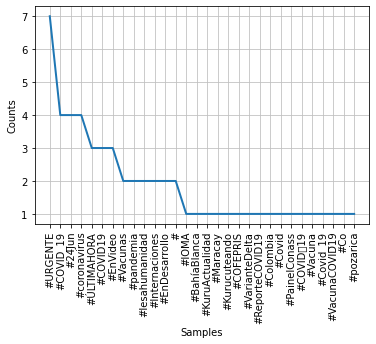

Distribución de Frequencia de Todas las Palabras
50 palabras mas frequentes [(':', 156), ('RT', 114), ('.', 109), (',', 93), ('…', 87), ('coronavirus', 59), ('“', 28), ('-', 28), ('”', 27), ('|', 23), ('Coronavirus', 21), ('Delta', 20), ('"', 19), ('casos', 19), ('El', 13), ('variante', 12), ('Perú', 12), ('nuevo', 11), ('vacunas', 11), ('100', 11), ('COVID', 11), ('(', 10), (')', 10), ('muertos', 10), ('dosis', 10), ('24', 9), ('19', 9), ('gobierno', 8), ('vacunación', 8), ('vacuna', 8), ('Pfizer', 8), ('La', 8), ('hoy', 7), ('contagios', 7), ('Si', 7), ('Un', 7), ('Dr', 7), ('nuevos', 7), ('Sin', 7), ('hacer', 7), ('mención', 7), ('Gustavo', 7), ('Petro', 7), ('recién', 7), ('llamó', 7), ('mentiroso', 7), ('atribuir', 7), ('aglomeraciones', 7), ('paro', 7), ('llegara', 7)]


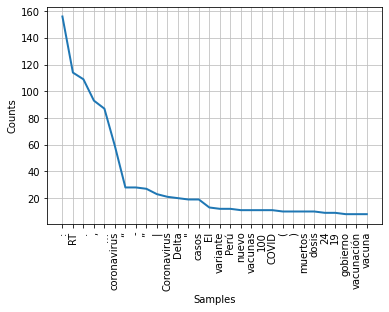

1025
BIGRAMAS <generator object bigrams at 0x7f3c8dbea450>


In [ ]:
from nltk import bigrams

'''Obtener estadísticas de los tweets'''
def get_estadisticas(tweets_tokens_all):

    # Crea una lista con todos los #hash-tags
    terms_hash = [term for term in tweets_tokens_all if term.startswith('#')]
    print('Distribución de Frequencia de HashTags')
    fdist = nltk.FreqDist(terms_hash)
    print('50 palabras mas frequentes',fdist.most_common(50))
    fdist.plot(30, cumulative=False)
    
    # Cuenta las palabras unicamente, sin #hashtags ni @-menciones
    terms_only = [term for term in tweets_tokens_all if term not in stopwords
                   and not term.startswith(('#', '@'))]
    print('Distribución de Frequencia de Todas las Palabras')
    fdist_todos = nltk.FreqDist(terms_only)
    print('50 palabras mas frequentes',fdist_todos.most_common(50))
    fdist_todos.plot(30, cumulative=False)    
                              
get_estadisticas(tokens_text("coronavirus.json"))